In [19]:
import math

import cufflinks as cf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPYNBrenderer import render_google_doc
from tensorflow import keras
import tensorflow as tf
cf.go_offline(connected=True)


$ \beta_1 = 0.9  , \beta_2 =0.999 \ s_0 = 0 \ m_0 = 0 , t_0 = 0 , w = w , b= b   $

#### step 1
$$ \ m_{current} = \beta_1 m_{old} + (1- \beta_1) (\frac{\partial c}{\partial w _{((w)}})

#### step 2
$$ \ s_{current} = \beta_2 s_{old} + (1- \beta_2) (\frac{\partial c}{\partial w _{((w)}}) 

#### step 3
$$ \ \hat m_1 = \frac{m_{current} }{1 - \beta_{1}^{t^1}}

#### step 4
$$ \ \hat s_1 = \frac{s_{current} }{1 - \beta_{2}^{t^1}}

#### step 3
$$ \ \hat m_1 = \frac{m_{current} }{1 - \beta_{1}^{t^1}}

$$ \ w_{new} = w_{current} - \eta \frac{\hat m}{\sqrt {(\hat s + \epsilon)}}

In [2]:
def MSE_loss(target_y, predicted_y):
  error = target_y - predicted_y
  squared_error = tf.square(error)
  mse = tf.reduce_mean(squared_error)
  return mse

2022-10-24 01:24:53.766022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 01:24:53.798034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 01:24:53.798994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 01:24:53.801703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

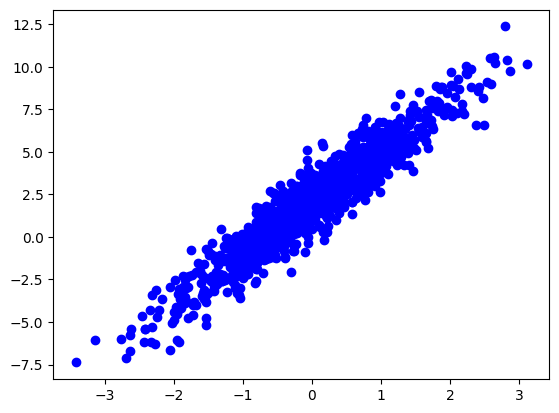

In [3]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000


x = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
y = x * TRUE_W + TRUE_B + noise

plt.scatter(x, y, c='b')

In [4]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

    # initial weights
    self.w = tf.Variable(5.0) # TRUE_W = 3.0
    self.b = tf.Variable(0.0) # TRUE_B = 2.0

    self.w_m  =  tf.Variable(0.0)
    self.b_m =  tf.Variable(0.0)
    self.s_w =  tf.Variable(0.0)
    self.s_b =  tf.Variable(0.0)

  def __call__(self, x):
    return (self.w*x + self.b)

In [5]:
model = MyModel()

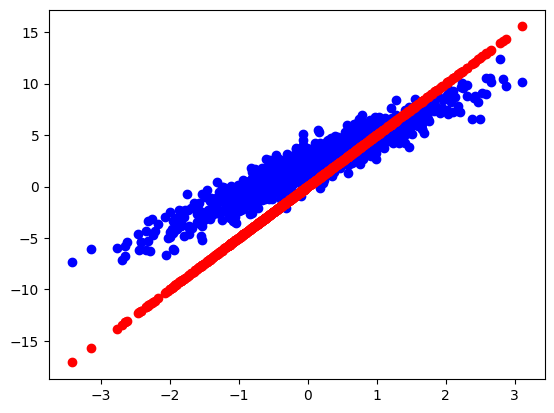

In [6]:
plt.scatter(x, y, c="b")

pred_y = model(x) # its an untrained model
plt.scatter(x, pred_y, c="r")

plt.show()


In [7]:
def adam_optimizer_train(model, x, y, learning_rate , epsilon=1e-5 , beta1= 0.9 , beta2= 0.999):

  with tf.GradientTape(persistent=True) as tape:
    y_hat= model(x)
    current_loss = MSE_loss(y, y_hat)

  dc_dw, dc_db = tape.gradient(current_loss, [model.w, model.b])
  mw_new = beta1 * model.w_m + (1- beta1) * dc_dw
  mb_new = beta1 * model.b_m  + (1- beta1) * dc_db

  sw_new = beta2 * model.s_w + (1- beta2) * tf.square(dc_dw)
  sb_new = beta2 * model.s_b + (1- beta2) * tf.square(dc_dw) 

  mw_hat = mw_new /(1- beta1)
  mb_hat = mb_new / (1- beta1)

  sw_hat = sw_new / (1-beta2)
  sb_hat = sb_new / (1- beta2)




  model.w.assign_sub((learning_rate* mw_hat ) / tf.sqrt(sw_hat + epsilon)) 
  model.b.assign_sub((learning_rate * mb_hat) / tf.sqrt(sb_hat + epsilon)) 
  model.w_m.assign(mw_new )
  model.b_m.assign(mb_new)
  model.s_w.assign(sw_new )
  model.s_b.assign(sb_new )
  return current_loss

In [8]:
model = MyModel()

Ws, bs , mw,  mb, sw , sb  = list(), list() , list() , list() , list() , list()
LOSS = list()
epochs = 40

learning_rate = 0.9 # LARGE LEARNING RATE

w = model.w.numpy()
b = model.b.numpy()

init_loss = MSE_loss(y, model(x)).numpy()

print(f"initial W: {w}, initial_bias: {b}, initial loss: {init_loss}")

initial W: 5.0, initial_bias: 0.0, initial loss: 9.742825508117676


In [9]:
for epoch in range(epochs):
  adam_optimizer_train(model, x, y, learning_rate )

  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())
  sw.append(model.s_w.numpy())
  sb.append(model.s_b.numpy())
  mw.append(model.w_m.numpy())
  mb.append(model.b_m.numpy())
  current_loss = MSE_loss(y, model(x))
  LOSS.append(current_loss.numpy())

  print(f"For epoch: {epoch}, W: {Ws[-1]}, bias: {bs[-1]}, current loss: {current_loss}")

For epoch: 0, W: 4.100000381469727, bias: 0.8658536076545715, current loss: 3.821901321411133
For epoch: 1, W: 2.954754590988159, bias: 1.9857845306396484, current loss: 1.0306366682052612
For epoch: 2, W: 1.9336063861846924, bias: 3.0193381309509277, current loss: 3.161341667175293
For epoch: 3, W: 1.4687104225158691, bias: 3.542518138885498, current loss: 5.758070945739746
For epoch: 4, W: 1.5713545083999634, bias: 3.5179569721221924, current loss: 5.359572887420654
For epoch: 5, W: 2.0436267852783203, bias: 3.117867946624756, current loss: 3.1285762786865234
For epoch: 6, W: 2.701474189758301, bias: 2.5067033767700195, current loss: 1.317013144493103
For epoch: 7, W: 3.3668107986450195, bias: 1.846781611442566, current loss: 1.2288216352462769
For epoch: 8, W: 3.862189292907715, bias: 1.3090519905090332, current loss: 2.431295394897461
For epoch: 9, W: 4.0711283683776855, bias: 1.020220398902893, current loss: 3.402143955230713
For epoch: 10, W: 3.9863016605377197, bias: 1.010011553

In [10]:
data = pd.DataFrame({"W": Ws, "b": bs, "sw": sw, "sb": sb , "mw" : mw , "mb" : mb})

In [11]:
data["w_true"] = TRUE_W
data["b_true"] = TRUE_B

In [12]:
data['epoch'] = range(epochs)
data['loss'] = LOSS

In [13]:
data.iplot(kind="scatter" , x="epoch", y=["W" , "b" , "w_true" , "b_true"], mode="lines+markers", title="W vs epoch")

In [14]:
data.iplot(kind="scatter" , x="epoch", y=["loss" , "W" , "b" , "w_true" , "b_true"], mode="lines+markers", title="W vs epoch")

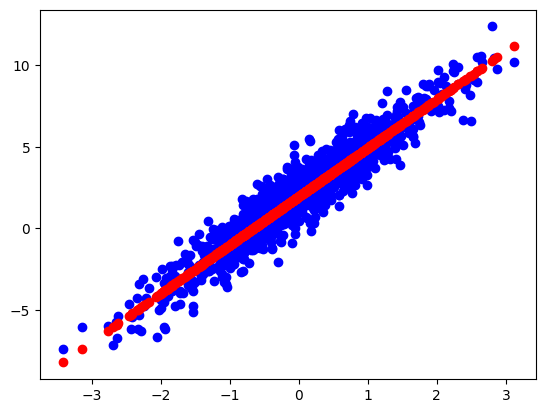

In [15]:
plt.scatter(x, y, c="b")

pred_y = model(x) # its an untrained model
plt.scatter(x, pred_y, c="r")

plt.show()

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255
X_test = X_test /255
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
import os


TENSOR_LOG_PATH = os.path.join(os.getcwd() , "TENSOR_BOARD_LOG")
os.makedirs(TENSOR_LOG_PATH , exist_ok=True )

In [18]:
%%timeit
LAYERS = [ tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    
    tf.keras.layers.Dense(10, activation="softmax")]
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2 ,monitor='val_loss',restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(TENSOR_LOG_PATH)
model_normalized_batch= tf.keras.models.Sequential(LAYERS)
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
model_normalized_batch.compile(loss="sparse_categorical_crossentropy", optimizer=OPTIMIZER , metrics=["accuracy"])
history = model_normalized_batch.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb , tensorboard_cb])

Epoch 1/100
  12/1719 [..............................] - ETA: 25s - loss: 1.4789 - accuracy: 0.5365

2022-10-24 01:25:00.089401: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 [==============================] - 30s 17ms/step - loss: 0.4825 - accuracy: 0.8272 - val_loss: 0.3814 - val_accuracy: 0.8656
Epoch 2/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3810 - accuracy: 0.8604 - val_loss: 0.3656 - val_accuracy: 0.8636
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3501 - accuracy: 0.8712 - val_loss: 0.3373 - val_accuracy: 0.8764
Epoch 4/100
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3274 - accuracy: 0.8786 - val_loss: 0.3282 - val_accuracy: 0.8840
Epoch 5/100
1719/1719 [==============================] - 27s 16ms/step - loss: 0.3081 - accuracy: 0.8861 - val_loss: 0.3234 - val_accuracy: 0.8852
Epoch 6/100
1719/1719 [==============================] - 28s 16ms/step - loss: 0.2969 - accuracy: 0.8907 - val_loss: 0.3145 - val_accuracy: 0.8840
Epoch 7/100
1719/1719 [==============================] - 28s 16ms/step - loss: 0.2836 - accuracy: 0.8939 - val_loss: 0.3196 - val_ac

In [ ]:
## 